# Case Study: Mating Success of Elephants
Predictor: Age: age at beginning in years (range from 27-52)  
Outcome: Matings: #successful matings

Question: 
- What's the relationship between mating success and age?
- Do males have diminished success after reaching some optimal age?

In [1]:
# load data
library(Sleuth3)
elmasu = case2201
Age = elmasu$Age
Matings = elmasu$Matings

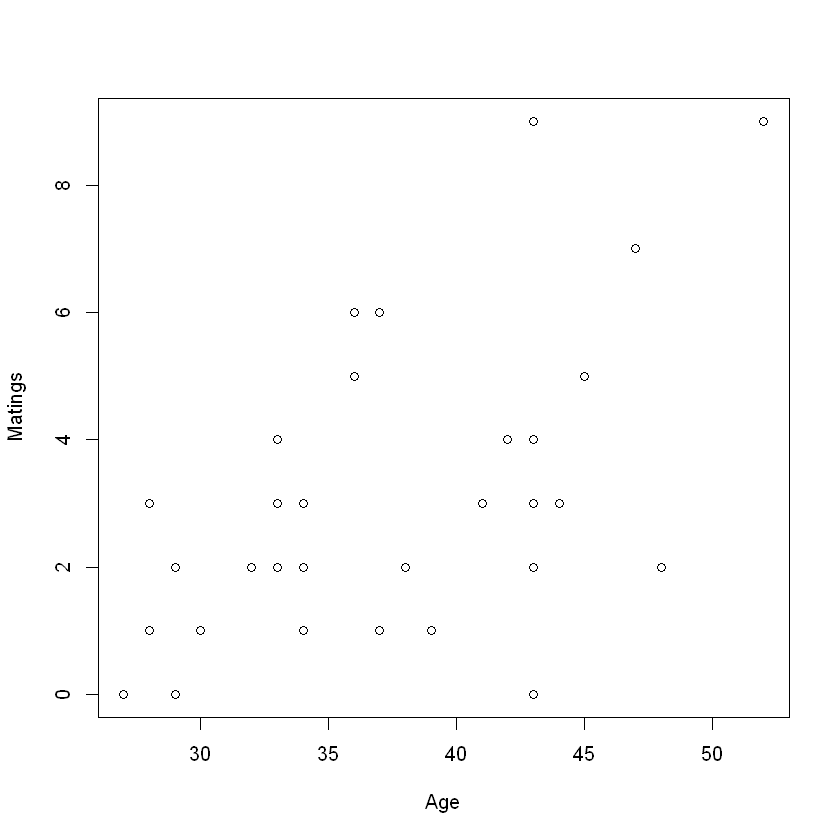

In [2]:
plot(Age, Matings)

## Why not Linear Regression
- outcome is counts and small numbers
- won't have a normal distribution conditional on age

# Poisson distribution
Useful for counts of rare events

Poisson link function: $g(\mu)=log(\mu)$, also called a log-linear model

Interpretation of $\beta$'s: Increase $x_j$ by one unit, and holding other predictors constant, $\mu_j$ changes by a factor of $e^{\beta_j}$

Then, $\mu = e^{X\beta}$

Estimation method: MLE by IRLS algorithm

Inference: Wald procedures and likelihood ratio test (as in logistic regression)

## Checking Model Adequacy
(similar to binomial logistic regression)
- Linear in $\beta$'s: Plot $\log(y_i)$ vs. $x$'s to see if linear relationship is appropriate. Jitter if many $y_i = 0$ (by using $\log(y_i+k),k$ is a small positive value)
- Outliers: Deviance and Pearson residuals 
- Correct form: Wald $(\hat\beta_j/se(\hat\beta_j)^2\sim \chi^2_{p+1})$ and LRT tests
- Adequate: Deviance GOF test

Common problem: $var(Y_i) > E(Y_i)$  
Solution: add an extra dispersion


## Model log likelihood
$$\mathcal{L} = \prod_1^n P(Y_i=y_i)=\prod_1^n \frac{e^{-\mu_i}\mu_i^{y_i}}{y_i!}$$

$$\log\mathcal{L}=\sum_1^n (-\mu_i + y_i\log(\mu_i)-\log(y_i!))$$

Since $\log(y_i)$ is a constant for $\mu_i$, we can drop it when maximizing likelihood.


In [3]:
fitllm = glm(Matings~Age, family=poisson)
summary(fitllm)


Call:
glm(formula = Matings ~ Age, family = poisson)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.80798  -0.86137  -0.08629   0.60087   2.17777  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.58201    0.54462  -2.905  0.00368 ** 
Age          0.06869    0.01375   4.997 5.81e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 51.012  on 39  degrees of freedom
AIC: 156.46

Number of Fisher Scoring iterations: 5


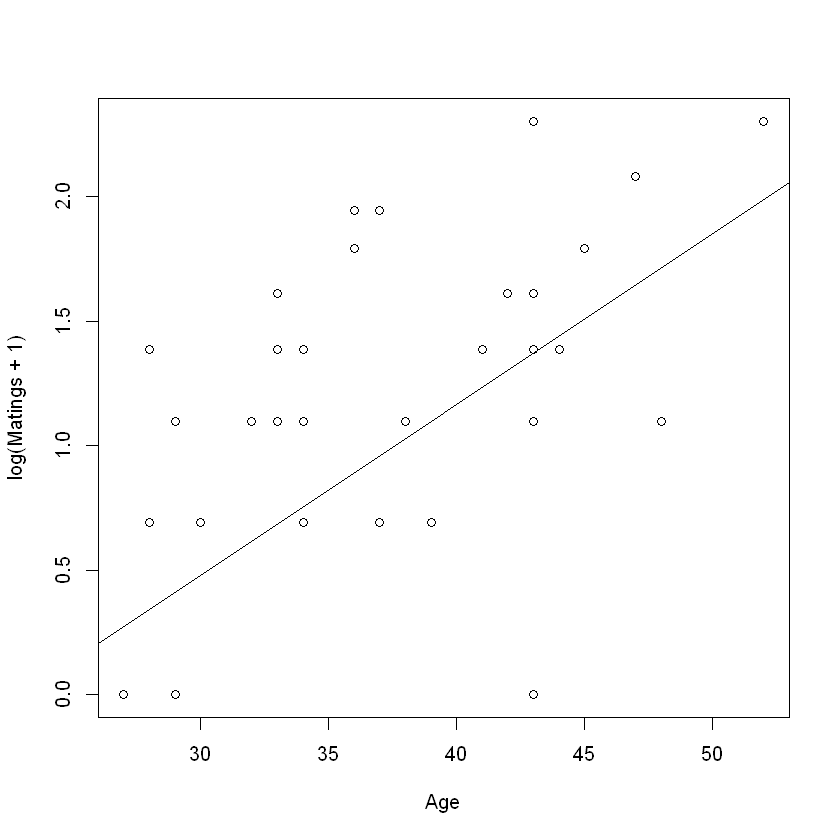

In [4]:
plot(Age, log(Matings + 1))
abline(fitllm$coefficients[1], fitllm$coefficients[2])

In [5]:
fitllm2 = glm(Matings~Age+I(Age^2), family=poisson)
summary(fitllm2)


Call:
glm(formula = Matings ~ Age + I(Age^2), family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8470  -0.8848  -0.1122   0.6580   2.1134  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.8574060  3.0356383  -0.941    0.347
Age          0.1359544  0.1580095   0.860    0.390
I(Age^2)    -0.0008595  0.0020124  -0.427    0.669

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 50.826  on 38  degrees of freedom
AIC: 158.27

Number of Fisher Scoring iterations: 5


In [6]:
print(AIC(fitllm))
print(BIC(fitllm))
print(AIC(fitllm2))
print(BIC(fitllm2))

[1] 156.4578
[1] 159.8849
[1] 158.2723
[1] 163.4131


In [7]:
yhats = predict.glm(fitllm, type="response")
rres = residuals(fitllm, type="response")
pres = residuals(fitllm, type="pearson")
dres = residuals(fitllm, type="deviance")
cbind(Matings, yhats, rres)

,Matings,yhats,rres
1,0,1.313503,-1.31350336
2,1,1.406903,-0.40690281
3,1,1.406903,-0.40690281
4,1,1.406903,-0.40690281
5,3,1.406903,1.59309719
6,0,1.506944,-1.50694362
7,0,1.506944,-1.50694362
8,0,1.506944,-1.50694362
9,2,1.506944,0.49305638
10,2,1.506944,0.49305638


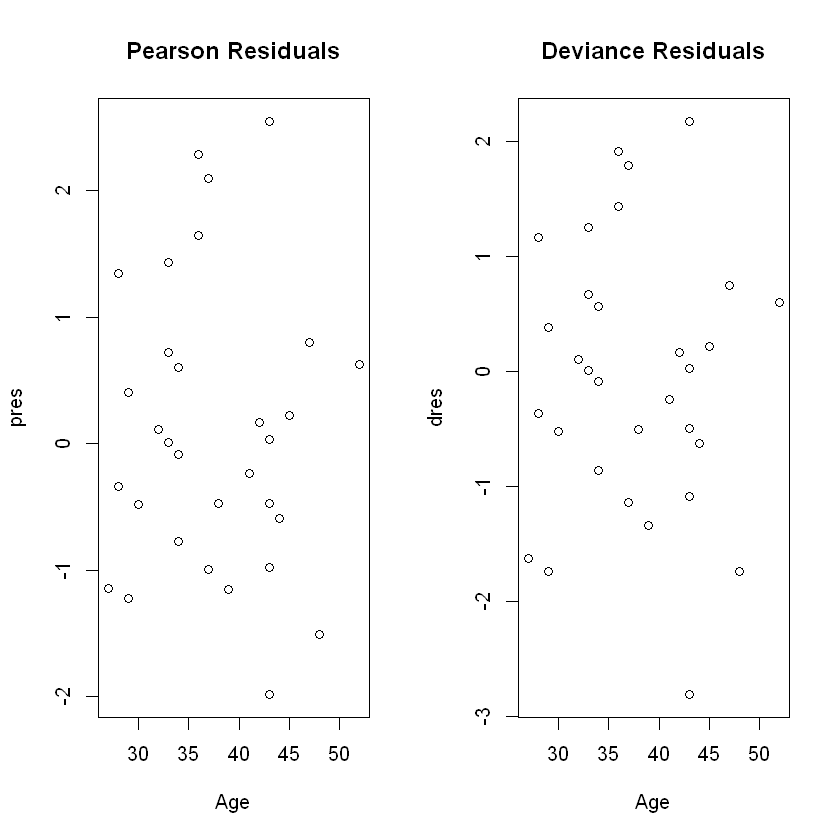

In [8]:
par(mfrow=c(1,2))
plot(Age, pres, main="Pearson Residuals")
plot(Age, dres, main="Deviance Residuals")

In [9]:
psihat = sum(pres^2 / fitllm$df.residual)
summary(fitllm, dispersion=psihat)


Call:
glm(formula = Matings ~ Age, family = poisson)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.80798  -0.86137  -0.08629   0.60087   2.17777  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.58201    0.58590  -2.700  0.00693 ** 
Age          0.06869    0.01479   4.645  3.4e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1.157334)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 51.012  on 39  degrees of freedom
AIC: 156.46

Number of Fisher Scoring iterations: 5


In [10]:
fitlm = lm(Matings~Age)
summary(fitlm)


Call:
lm(formula = Matings ~ Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1158 -1.3087 -0.1082  0.8892  4.8842 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.50589    1.61899  -2.783  0.00826 ** 
Age          0.20050    0.04443   4.513 5.75e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.849 on 39 degrees of freedom
Multiple R-squared:  0.343,	Adjusted R-squared:  0.3262 
F-statistic: 20.36 on 1 and 39 DF,  p-value: 5.749e-05


In [11]:
fitlml = lm(log(Matings+1)~Age)
summary(fitlml)


Call:
lm(formula = log(Matings + 1) ~ Age)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49087 -0.33939  0.06607  0.35376  0.81171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.69893    0.45861  -1.524 0.135567    
Age          0.05093    0.01259   4.046 0.000238 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5237 on 39 degrees of freedom
Multiple R-squared:  0.2957,	Adjusted R-squared:  0.2776 
F-statistic: 16.37 on 1 and 39 DF,  p-value: 0.0002385


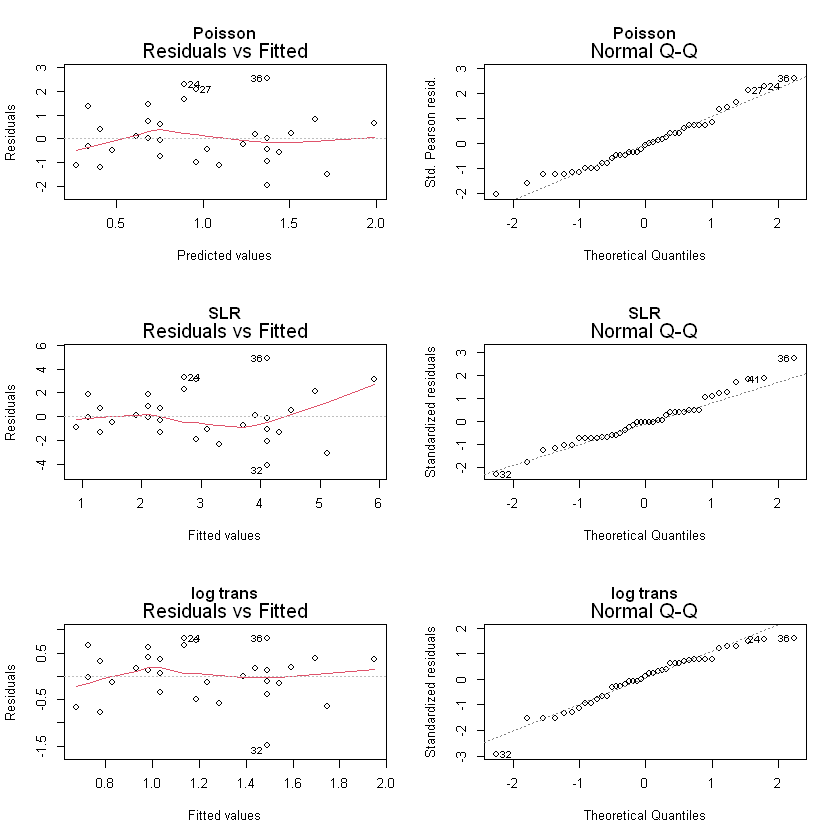

In [12]:
par(mfrow=c(3,2))
plot(fitllm, which=1:2, main="Poisson")
plot(fitlm, which=1:2, main="SLR")
plot(fitlml, which=1:2, main="log trans")

## Deviance GOF Test

In [13]:
# test statistic
fitllm$deviance

[1] 51.01163

In [14]:
# p-value
1 - pchisq(51.012, 39)

[1] 0.09425638

Question: determine whether the fitted model fits as well as the saturated model

Hypotheses: 
$H_0: $ fitted model fits as well as saturated model  
$H_a: $ Saturated model fits better

Test Statistic: $51.012\sim \chi^2_{41-2}$

p-value: 0.094

Conclusion: weak evidence that fitted model is adequate. 

## Wald or LRT

In [15]:
summary(fitllm)


Call:
glm(formula = Matings ~ Age, family = poisson)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.80798  -0.86137  -0.08629   0.60087   2.17777  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.58201    0.54462  -2.905  0.00368 ** 
Age          0.06869    0.01375   4.997 5.81e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 51.012  on 39  degrees of freedom
AIC: 156.46

Number of Fisher Scoring iterations: 5


In [16]:
summary(fitllm2)


Call:
glm(formula = Matings ~ Age + I(Age^2), family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8470  -0.8848  -0.1122   0.6580   2.1134  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.8574060  3.0356383  -0.941    0.347
Age          0.1359544  0.1580095   0.860    0.390
I(Age^2)    -0.0008595  0.0020124  -0.427    0.669

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 50.826  on 38  degrees of freedom
AIC: 158.27

Number of Fisher Scoring iterations: 5



Question: determine whether the mean number of successful matings tends to peak at some age and then decrease or whether the mean continues to increase with age

**Wald**  
Hypotheses: $H_0: \beta_2 = 0, H_a:\beta_3\neq 0$

Test Statistic: $-0.427\sim N(0,1)$

p-value: $0.669$

**LRT**  
Hypothesis: $H_0: $ the model without higher order term is better. $H_a: $ the model with higher order term is better.

Test statistic: $51.012 - 50.826 = 0.186\sim \chi^2_1$

p-value: $0.667$

Conclusion: There is strong evidence that the quadratic term does not contribute to the model. The data provides no evidence that the mean number of successful matings peak at some age

# Practice Example

In [17]:
library(Sleuth3)
elmasu = case2201
Age = elmasu$Age
Matings = elmasu$Matings

fitllm = glm(Matings~Age, family=poisson)
summary(fitllm)


Call:
glm(formula = Matings ~ Age, family = poisson)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.80798  -0.86137  -0.08629   0.60087   2.17777  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.58201    0.54462  -2.905  0.00368 ** 
Age          0.06869    0.01375   4.997 5.81e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 51.012  on 39  degrees of freedom
AIC: 156.46

Number of Fisher Scoring iterations: 5


In [18]:
fitho = glm(Matings~Age + I(Age^2), family=poisson)
summary(fitho)


Call:
glm(formula = Matings ~ Age + I(Age^2), family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8470  -0.8848  -0.1122   0.6580   2.1134  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.8574060  3.0356383  -0.941    0.347
Age          0.1359544  0.1580095   0.860    0.390
I(Age^2)    -0.0008595  0.0020124  -0.427    0.669

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 50.826  on 38  degrees of freedom
AIC: 158.27

Number of Fisher Scoring iterations: 5


## Part (a)
_Consider the elephant mating example from lecture._

 1. _Both the binomial and the Poisson distributions provide probability models for counts. Is the binomial distribution appropriate for the number of successful matings of the male African elephants?_  
No, the binomial distribution has a upper bound for the number of success. (Number of success in a definite number of trials). 
 2. _For the model fit in lecture, interpret the coefficient of age._  
 Keeping other explanatory variables constant, one year increase in age will increase the number of matings by $e^{\beta_1}-1 = e^{0.0687}-1=0.07$
 3. _Consider the plot of the number of matings versus age. The spread of the responses is larger for larger values of the mean response. Should we be concerned?_  
No, the model assumes the underlying distribution is Poisson, where $E(X)=var(X)=\mu$. Therefore, the spread will increase as the increase of of the mean response 
 4. _From the estimated log-linear regression of the elephants' successful matings on age, what are the mean and variance of counts of successful matings (in the 8 years of the study) for the elephants who are aged 25 years at the beginning of the observation period? What are the mean and variance for elephants who are aged 45 years?_
 For 25 years old: mean = variance = $e^{-1.582+(0.0687)25}=1.15$
 For 25 years old: mean = variance = $e^{-1.582+(0.0687)45}=4.53$
 5. _While it is hypothesized that the number of matings increases with age, there
may be an optimal age for matings where, for older elephants the number of
matings starts to decline. One way to investigate this is to add a quadratic term
for age into the model to allow the log of the mean number of matings to reach
a peak. Does the inclusion in the model of $age^2$ improve the fit?_   
By Wald test, since $p=0.669$, we cannot reject the null hypothesis, there is no evidence that the higher order term improve the fit

## Part (b)
_What is the difference between a log-linear model and a linear model after the log transformation of the response?_

For log-linear model, mean is $\mu$, the model is $\log(\mu)=X\beta$.

For SLR with transformation, the model is expressed in terms of the mean of the log of $Y$ with different model assumptions. 
 - different variance
 - different test procedures and diagnosis
 


## Part (c) 
_Why are ordinary residuals $y_i-\hat\mu_i$ not particularly useful for Poisson regression?_

Because the variance in Poisson model is not constant. The residuals with larger means will have larger variances. So if an observation has
a large residual it is diffcult to know whether it is an outlier or an observation from
a distribution with larger variance than the others. Residuals that are studentized
so that they have the same variance are more useful for identifying outliers.

## Part (d)
_Consider the deviance goodness-of-t test._
 1. _Under what conditions is it valid for Poisson regression?_  
 The sample size for each group is large enough. 
 2. _When it is valid, what possibilities are suggested by a small p-value?_
 The Poisson distribution is an inadequate model, the explanatory variables are inadequate, or there are some outliers. 
 3. _Large p-value?_  
 Model is correct, or there is insufficient data to detect any inadequacies. 

Because the underlying distribution is Poission. The likelihood function is
$$\prod_1^n \frac{\mu_i^{y_i}e^{-\mu_i}}{y_i!}=\frac{e^{-\sum \mu_i}\prod \mu_i^{y_i}}{\prod y_i!}$$
Take log
$$=-\sum \mu_i + \sum y_i \log(mu_i) - \sum \log(y_i!)$$
Where $\mu_i = e^{X_{\cdot,i}\beta}$ (X: the ith observation)
